In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
data = pd.merge(transactions, customers, on="CustomerID", how="inner")

In [4]:
customer_data = data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    avg_transaction_value=('TotalValue', 'mean'),
    num_transactions=('TransactionID', 'nunique')
).reset_index()

In [5]:
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_spent', 'total_quantity', 'avg_transaction_value', 'num_transactions']])


In [6]:
k_values = range(2, 11)
db_scores = []
sil_scores = []
kmeans_models = {}

In [7]:
customer_data_copy = customer_data.copy()

In [8]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)

    customer_data_copy['Cluster'] = kmeans.fit_predict(customer_data_scaled)
    db_score = davies_bouldin_score(customer_data_scaled, customer_data_copy['Cluster'])
    sil_score = silhouette_score(customer_data_scaled, customer_data_copy['Cluster'])
    
    db_scores.append(db_score)
    sil_scores.append(sil_score)
    kmeans_models[k] = kmeans


C:\Users\ASUS\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\ASUS\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\ASUS\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ASUS\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\c

In [9]:
optimal_k = k_values[np.argmin(db_scores)]

In [10]:
optimal_kmeans = kmeans_models[optimal_k]
customer_data_copy['Cluster'] = optimal_kmeans.predict(customer_data_scaled)

In [11]:
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"DB Index: {min(db_scores)}")
print(f"Silhouette Score: {sil_scores[np.argmin(db_scores)]}")

Optimal Number of Clusters: 10
DB Index: 0.9139745364618437
Silhouette Score: 0.3013185636966401


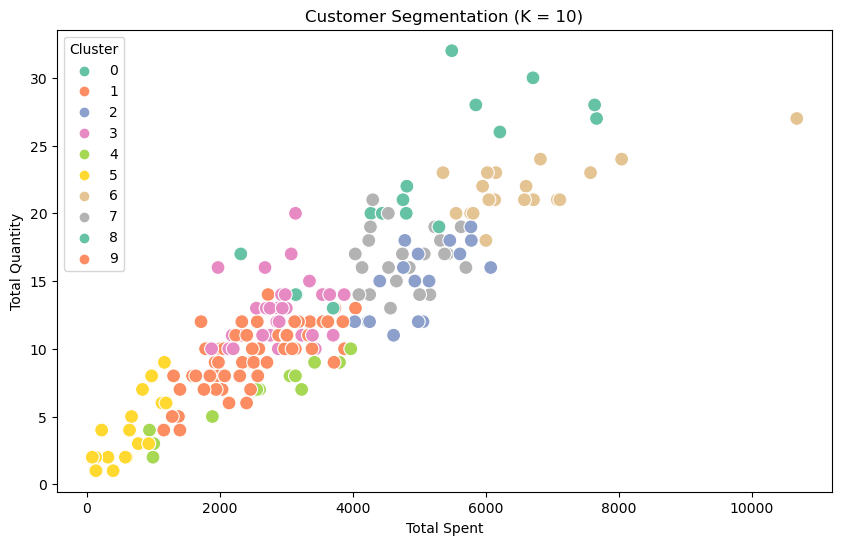

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_spent', 
                y='total_quantity', hue='Cluster', 
                data=customer_data_copy, 
                palette='Set2', 
                s=100)
plt.title(f"Customer Segmentation (K = {optimal_k})")
plt.xlabel('Total Spent')
plt.ylabel('Total Quantity')
plt.legend(title='Cluster')
plt.show()

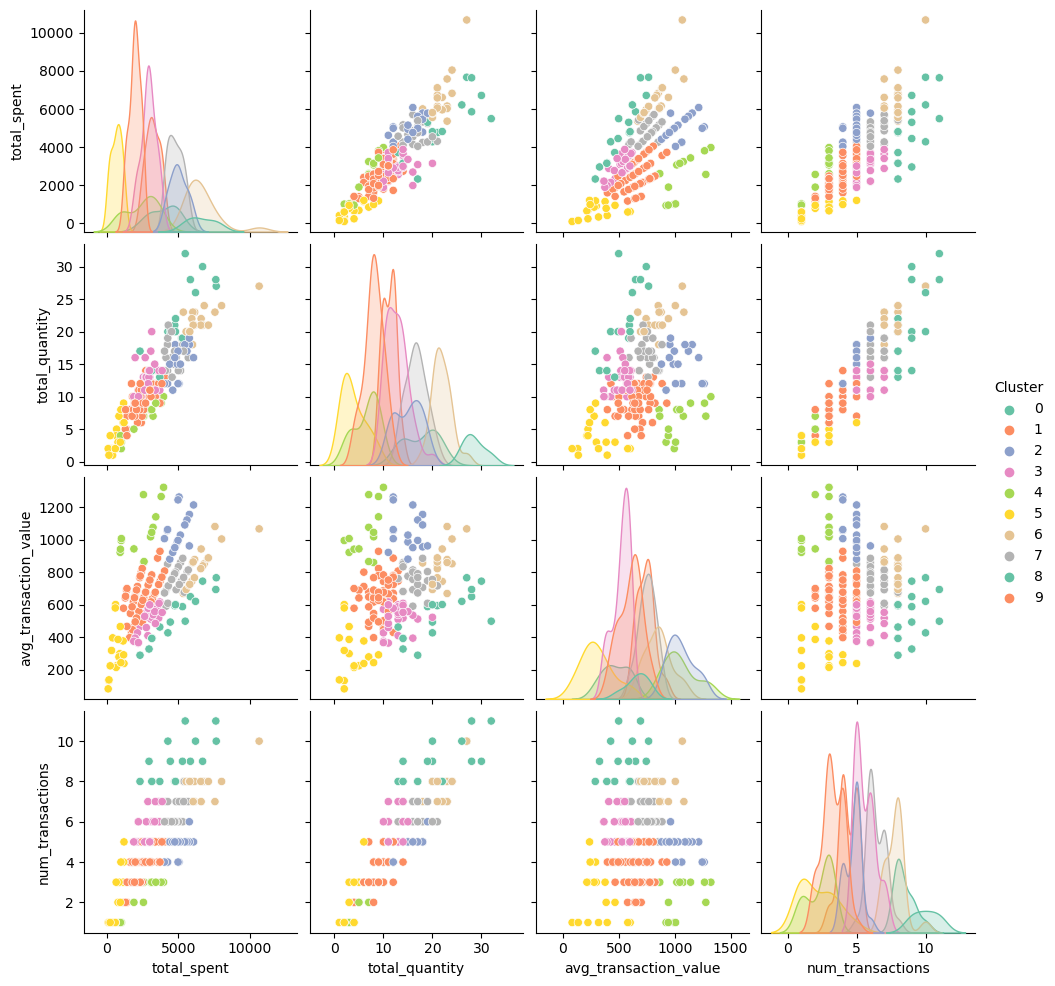

In [13]:
sns.pairplot(customer_data_copy, hue='Cluster', 
             vars=['total_spent', 'total_quantity', 'avg_transaction_value', 'num_transactions'], 
             palette='Set2')
plt.show()